### Hypothesis: Training all of the encoders individually on STS might produce better results.

Results: Individual autoencoders reach nearly as good performance (Max 71% test corr). This is super promising.

In [1]:
import transformer_lens
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import numpy as np

import torch.nn.functional as F

from tqdm import tqdm

import random

In [2]:
seed = 42
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)

In [3]:
# Load datasets
train_set = load_dataset("sentence-transformers/stsb", split="train")
val_set   = load_dataset("sentence-transformers/stsb", split="validation")
test_set  = load_dataset("sentence-transformers/stsb", split="test")

first_train  = torch.load('gpt2_medium_train_acts_1.npy')
second_train = torch.load('gpt2_medium_train_acts_2.npy')

first_test = torch.load('gpt2_medium_test_acts_1.npy')
second_test = torch.load('gpt2_medium_test_acts_2.npy')

wikitext_acts = torch.load('generics_kb_20k_10312024.npy')

train_scores = torch.Tensor(train_set['score'])
test_scores = torch.Tensor(test_set['score'])

## Pretrain as normal

  4%|███▎                                                                              | 10/250 [02:09<52:39, 13.16s/it]


Epoch 10
Train Losses - Early: 0.301, Mid: 1.289, Late: 10.822
Test Losses  - Early: 1.417, Mid: 5.092, Late: 26.179


  8%|██████▌                                                                           | 20/250 [04:18<49:18, 12.86s/it]


Epoch 20
Train Losses - Early: 0.249, Mid: 1.065, Late: 8.316
Test Losses  - Early: 1.315, Mid: 4.639, Late: 21.923


 12%|█████████▊                                                                        | 30/250 [06:27<47:23, 12.93s/it]


Epoch 30
Train Losses - Early: 0.220, Mid: 0.959, Late: 7.450
Test Losses  - Early: 1.274, Mid: 4.444, Late: 20.402


 16%|█████████████                                                                     | 40/250 [08:32<43:35, 12.46s/it]


Epoch 40
Train Losses - Early: 0.199, Mid: 0.888, Late: 6.928
Test Losses  - Early: 1.252, Mid: 4.341, Late: 19.845


 20%|████████████████▍                                                                 | 50/250 [10:36<41:11, 12.36s/it]


Epoch 50
Train Losses - Early: 0.185, Mid: 0.834, Late: 6.564
Test Losses  - Early: 1.240, Mid: 4.303, Late: 19.632


 24%|███████████████████▋                                                              | 60/250 [12:39<39:04, 12.34s/it]


Epoch 60
Train Losses - Early: 0.175, Mid: 0.793, Late: 6.275
Test Losses  - Early: 1.239, Mid: 4.264, Late: 19.521


 28%|██████████████████████▉                                                           | 70/250 [14:42<37:04, 12.36s/it]


Epoch 70
Train Losses - Early: 0.167, Mid: 0.761, Late: 6.050
Test Losses  - Early: 1.246, Mid: 4.224, Late: 19.387


 32%|██████████████████████████▏                                                       | 80/250 [16:46<34:57, 12.34s/it]


Epoch 80
Train Losses - Early: 0.160, Mid: 0.737, Late: 5.867
Test Losses  - Early: 1.246, Mid: 4.210, Late: 19.169


 36%|█████████████████████████████▌                                                    | 90/250 [18:49<32:48, 12.30s/it]


Epoch 90
Train Losses - Early: 0.155, Mid: 0.717, Late: 5.709
Test Losses  - Early: 1.257, Mid: 4.199, Late: 19.483


 40%|████████████████████████████████▍                                                | 100/250 [20:52<30:41, 12.28s/it]


Epoch 100
Train Losses - Early: 0.151, Mid: 0.701, Late: 5.567
Test Losses  - Early: 1.262, Mid: 4.200, Late: 19.228


 44%|███████████████████████████████████▋                                             | 110/250 [22:55<28:51, 12.37s/it]


Epoch 110
Train Losses - Early: 0.147, Mid: 0.687, Late: 5.450
Test Losses  - Early: 1.264, Mid: 4.169, Late: 19.229


 48%|██████████████████████████████████████▉                                          | 120/250 [24:58<26:44, 12.34s/it]


Epoch 120
Train Losses - Early: 0.144, Mid: 0.675, Late: 5.343
Test Losses  - Early: 1.273, Mid: 4.165, Late: 19.110


 52%|██████████████████████████████████████████                                       | 130/250 [27:01<24:38, 12.32s/it]


Epoch 130
Train Losses - Early: 0.141, Mid: 0.665, Late: 5.245
Test Losses  - Early: 1.272, Mid: 4.168, Late: 19.221


 56%|█████████████████████████████████████████████▎                                   | 140/250 [29:04<22:31, 12.29s/it]


Epoch 140
Train Losses - Early: 0.139, Mid: 0.656, Late: 5.161
Test Losses  - Early: 1.275, Mid: 4.152, Late: 19.316


 60%|████████████████████████████████████████████████▌                                | 150/250 [31:07<20:36, 12.36s/it]


Epoch 150
Train Losses - Early: 0.136, Mid: 0.649, Late: 5.085
Test Losses  - Early: 1.285, Mid: 4.128, Late: 19.399


 64%|███████████████████████████████████████████████████▊                             | 160/250 [33:10<18:22, 12.25s/it]


Epoch 160
Train Losses - Early: 0.134, Mid: 0.642, Late: 5.016
Test Losses  - Early: 1.289, Mid: 4.096, Late: 19.125


 68%|███████████████████████████████████████████████████████                          | 170/250 [35:13<16:28, 12.36s/it]


Epoch 170
Train Losses - Early: 0.133, Mid: 0.637, Late: 4.954
Test Losses  - Early: 1.280, Mid: 4.103, Late: 19.240


 72%|██████████████████████████████████████████████████████████▎                      | 180/250 [37:17<14:25, 12.36s/it]


Epoch 180
Train Losses - Early: 0.131, Mid: 0.631, Late: 4.890
Test Losses  - Early: 1.292, Mid: 4.078, Late: 19.513


 76%|█████████████████████████████████████████████████████████████▌                   | 190/250 [39:20<12:21, 12.36s/it]


Epoch 190
Train Losses - Early: 0.130, Mid: 0.626, Late: 4.846
Test Losses  - Early: 1.287, Mid: 4.096, Late: 19.320


 80%|████████████████████████████████████████████████████████████████▊                | 200/250 [41:23<10:15, 12.30s/it]


Epoch 200
Train Losses - Early: 0.129, Mid: 0.622, Late: 4.794
Test Losses  - Early: 1.288, Mid: 4.089, Late: 19.433


 84%|████████████████████████████████████████████████████████████████████             | 210/250 [43:26<08:15, 12.38s/it]


Epoch 210
Train Losses - Early: 0.127, Mid: 0.617, Late: 4.742
Test Losses  - Early: 1.286, Mid: 4.065, Late: 19.532


 88%|███████████████████████████████████████████████████████████████████████▎         | 220/250 [45:29<06:10, 12.34s/it]


Epoch 220
Train Losses - Early: 0.126, Mid: 0.614, Late: 4.703
Test Losses  - Early: 1.284, Mid: 4.064, Late: 19.630


 92%|██████████████████████████████████████████████████████████████████████████▌      | 230/250 [47:33<04:06, 12.30s/it]


Epoch 230
Train Losses - Early: 0.125, Mid: 0.610, Late: 4.664
Test Losses  - Early: 1.286, Mid: 4.040, Late: 19.349


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 240/250 [49:36<02:03, 12.36s/it]


Epoch 240
Train Losses - Early: 0.124, Mid: 0.607, Late: 4.628
Test Losses  - Early: 1.288, Mid: 4.045, Late: 19.429


100%|█████████████████████████████████████████████████████████████████████████████████| 250/250 [51:39<00:00, 12.40s/it]


Epoch 250
Train Losses - Early: 0.124, Mid: 0.603, Late: 4.589
Test Losses  - Early: 1.287, Mid: 4.024, Late: 19.705


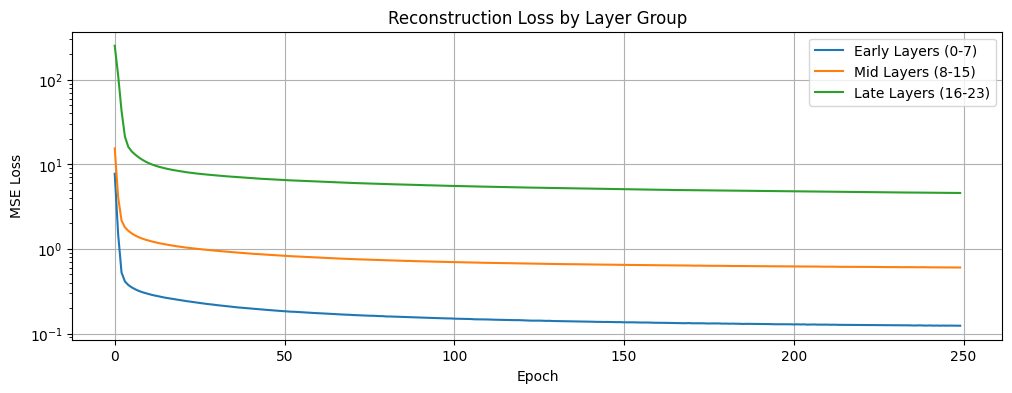

In [4]:
# We probably need to scale the hidden dimension based on how deep you are
def get_hidden(i):
    if i < 12:
        return 1
    else:
        return 2

class Autoencoder(nn.Module):
    def __init__(self, layer_idx, d_in=1024, base_width=256, dropout_rate=0.1):
        super().__init__()
        # Scale hidden dim based on layer position
        # Later layers get progressively larger capacity
        hidden_mult = get_hidden(layer_idx)
        d_hidden = int(base_width * hidden_mult)
        
        # Gradual dimension reduction
        d_mid = (d_in + d_hidden) // 2
        
        self.encode = nn.Sequential(
            nn.Linear(d_in, d_mid),
            nn.LayerNorm(d_mid),
            nn.Dropout(dropout_rate),  # After normalization, before activation
            nn.GELU(),
            nn.Linear(d_mid, d_hidden),
            nn.LayerNorm(d_hidden),
            nn.Dropout(dropout_rate),  # After normalization, before activation
            nn.GELU(),
        )
        
        self.decode = nn.Sequential(
            nn.Linear(d_hidden, d_mid),
            nn.LayerNorm(d_mid),
            nn.Dropout(dropout_rate),  # After normalization, before activation
            nn.GELU(),
            nn.Linear(d_mid, d_in),
            # No dropout before final output layer
        )
        
        # Initialize with smaller weights for stability
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight, gain=0.5)
                
    def forward(self, x):
        h = self.encode(x)
        return self.decode(h)

n_layers = 24
# Create layer-specific autoencoders
encoders = [Autoencoder(i).cuda() for i in range(n_layers)]

# Use different learning rates for different layers
lrs = [3e-4 * (1 + i/24) for i in range(n_layers)]  # Higher lr for harder layers. From 3e-4 -> 3e-4*3
optimizers = [torch.optim.AdamW(ae.parameters(), lr=lr, weight_decay=0.01) for ae, lr in zip(encoders, lrs)]

# Modified training loop with layer-specific logging
def train_epoch(models, acts, optimizers, batch_size=64):
    indices = torch.randperm(acts.shape[0])
    shuffled_acts = acts[indices]
    
    losses = []
    n_batches = shuffled_acts.shape[0] // batch_size
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        
        batch_losses = []
        for i, (model, optimizer) in enumerate(zip(models, optimizers)):
            model.train()
            batch_i = shuffled_acts[start_idx:end_idx, i].cuda()
            
            optimizer.zero_grad()
            loss = F.mse_loss(model(batch_i), batch_i)
            loss.backward()
            optimizer.step()
            
            batch_losses.append(loss.item())
        
        losses.append(batch_losses)
    
    return np.mean(losses, axis=0)

# Training with more detailed monitoring
early_layers_history = []
mid_layers_history = []
late_layers_history = []

all_acts = wikitext_acts
all_test_acts = torch.concat((first_test, second_test), axis=0)

for epoch in tqdm(range(250)):
    losses = train_epoch(encoders, all_acts, optimizers)
    
    # Track different layer groups
    early_layers_history.append(np.mean(losses[:8]))
    mid_layers_history.append(np.mean(losses[8:16]))
    late_layers_history.append(np.mean(losses[16:]))
    
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            [model.eval() for model in encoders]
            
            # Test losses by layer group
            test_preds = [encoders[i](all_test_acts[:, i].cuda()).cpu() for i in range(n_layers)]
            test_losses = [F.mse_loss(pred, all_test_acts[:, i]).item() for i, pred in enumerate(test_preds)]
            
            print(f"\nEpoch {epoch+1}")
            print(f"Train Losses - Early: {early_layers_history[-1]:.3f}, "
                  f"Mid: {mid_layers_history[-1]:.3f}, "
                  f"Late: {late_layers_history[-1]:.3f}")
            print(f"Test Losses  - Early: {np.mean(test_losses[:8]):.3f}, "
                  f"Mid: {np.mean(test_losses[8:16]):.3f}, "
                  f"Late: {np.mean(test_losses[16:]):.3f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.plot(early_layers_history, label='Early Layers (0-7)')
plt.plot(mid_layers_history, label='Mid Layers (8-15)')
plt.plot(late_layers_history, label='Late Layers (16-23)')
plt.title('Reconstruction Loss by Layer Group')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

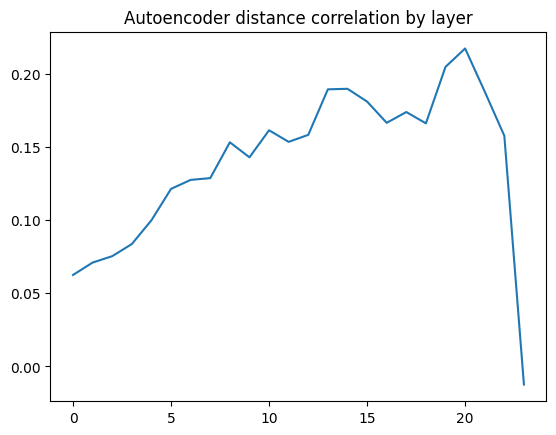

[0.062497712671756744,
 0.07096321880817413,
 0.07533936202526093,
 0.08361588418483734,
 0.09985025972127914,
 0.12130158394575119,
 0.12744757533073425,
 0.12864989042282104,
 0.15312246978282928,
 0.14286959171295166,
 0.1613394320011139,
 0.15342216193675995,
 0.15821810066699982,
 0.18932047486305237,
 0.18966789543628693,
 0.1809549331665039,
 0.16642636060714722,
 0.17380085587501526,
 0.16606977581977844,
 0.2046528309583664,
 0.21722368896007538,
 0.1878000795841217,
 0.1575614959001541,
 -0.012325497344136238]

In [16]:
from copy import deepcopy
from torch.nn.functional import cosine_similarity
def plot_autoencoder_corr(aes, is_ae):
    encs = [deepcopy(ae.encode).cuda() for ae in aes] if not is_ae else aes
    [m.eval() for m in encs]
    
    # Do a forward pass on each encoder for each pair of training sentences and collect the cosine distances
    batch_size = 32
    n_batches = first_test.shape[0] // batch_size
    
    corrs = []
    for l in range(n_layers):
        distances = []
        for i in range(n_batches+1):
            f = first_test[i*batch_size: (i+1)*batch_size, l,:]
            s = second_test[i*batch_size: (i+1)*batch_size, l, :]
        
            f_embed = encs[l](f.cuda())
            s_embed = encs[l](s.cuda())
        
            sims = cosine_similarity(f_embed, s_embed, dim=-1)
        
            distances.append(sims)
    
        corr = torch.corrcoef(torch.stack([torch.cat(distances).cpu(), test_scores]))[1][0]
        corrs.append(corr.item())
    
    plt.title("Autoencoder distance correlation by layer")
    plt.plot(corrs)
    plt.show()

    return corrs

plot_autoencoder_corr(encoders, True)

  1%|▊                                                                                  | 1/100 [00:04<06:51,  4.15s/it]

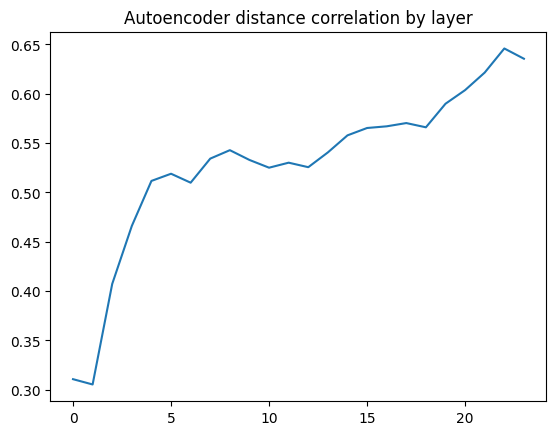

  3%|██▍                                                                                | 3/100 [00:12<06:46,  4.19s/it]

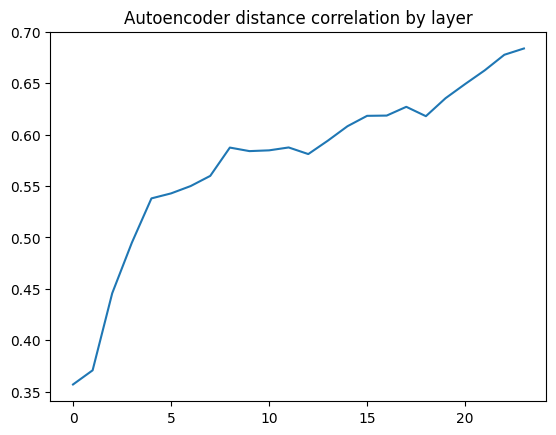

  5%|████▏                                                                              | 5/100 [00:20<06:34,  4.15s/it]

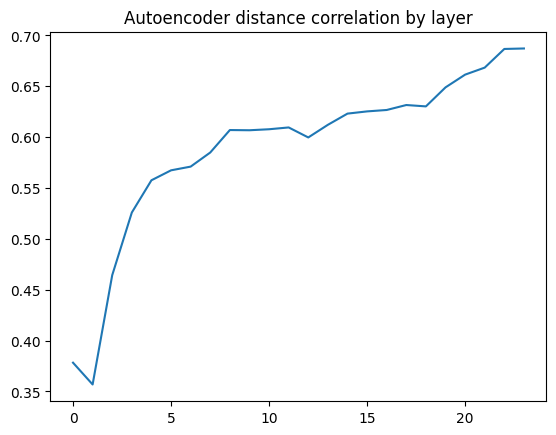

  7%|█████▊                                                                             | 7/100 [00:29<06:32,  4.22s/it]

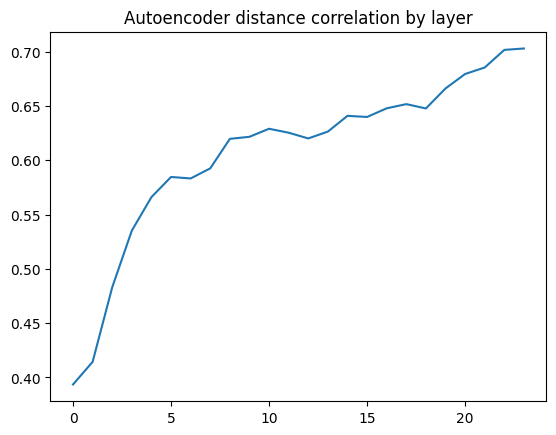

  9%|███████▍                                                                           | 9/100 [00:38<06:28,  4.27s/it]

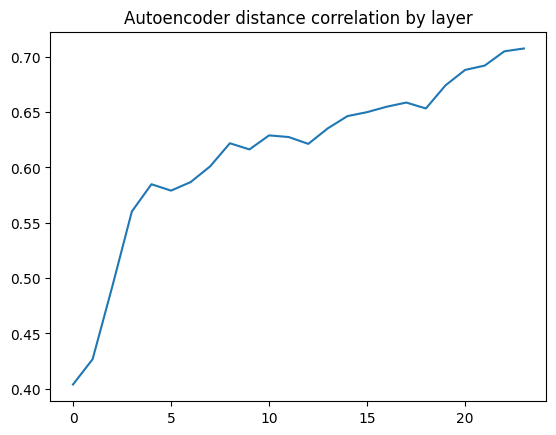

 11%|█████████                                                                         | 11/100 [00:46<06:19,  4.26s/it]

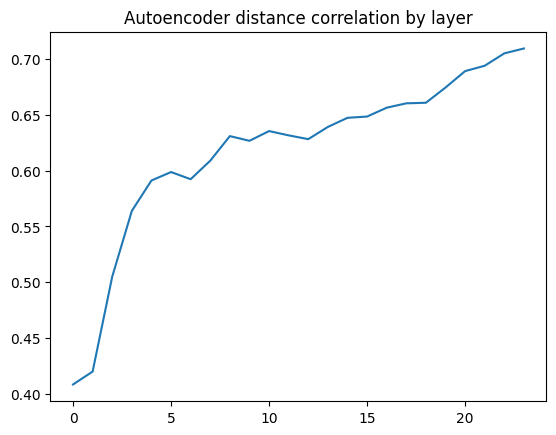

 13%|██████████▋                                                                       | 13/100 [00:55<06:13,  4.29s/it]

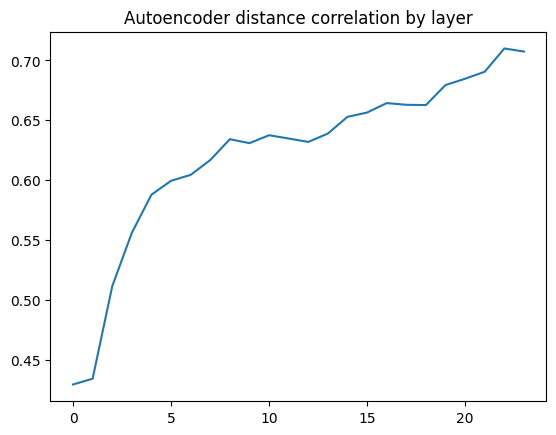

 15%|████████████▎                                                                     | 15/100 [01:04<06:04,  4.29s/it]

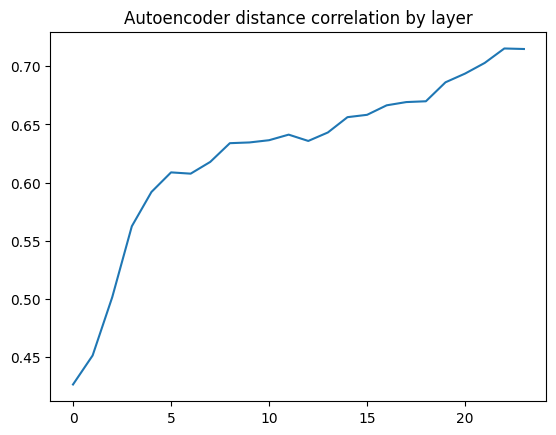

 17%|█████████████▉                                                                    | 17/100 [01:12<05:52,  4.25s/it]

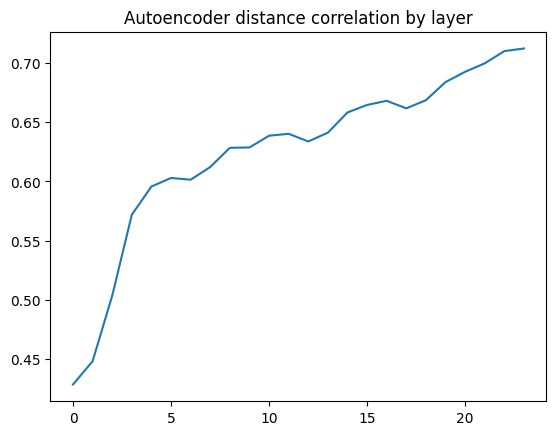

 19%|███████████████▌                                                                  | 19/100 [01:21<05:44,  4.25s/it]

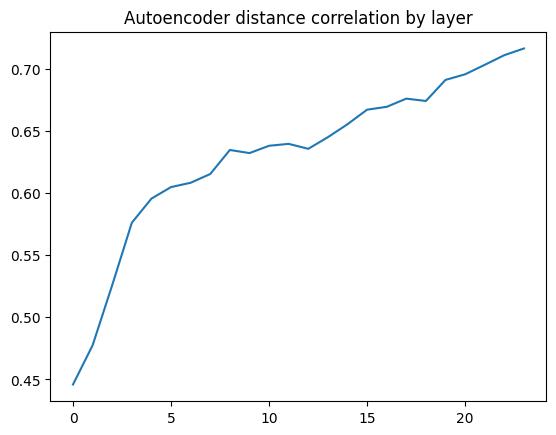

 21%|█████████████████▏                                                                | 21/100 [01:29<05:35,  4.25s/it]

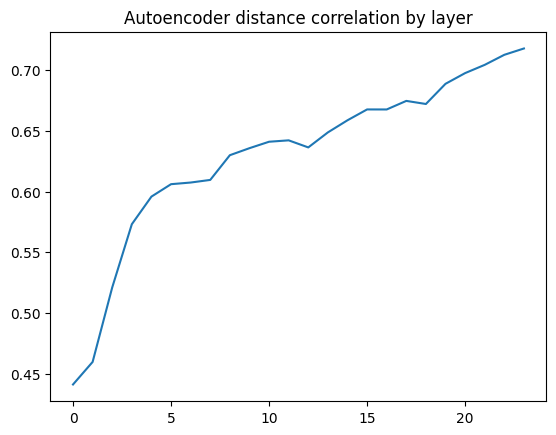

 23%|██████████████████▊                                                               | 23/100 [01:38<05:27,  4.25s/it]

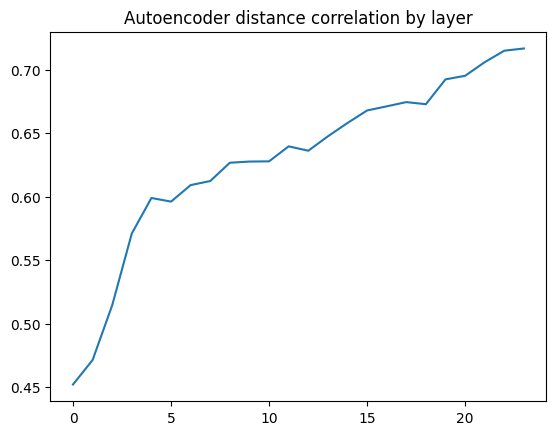

 25%|████████████████████▌                                                             | 25/100 [01:47<05:20,  4.27s/it]

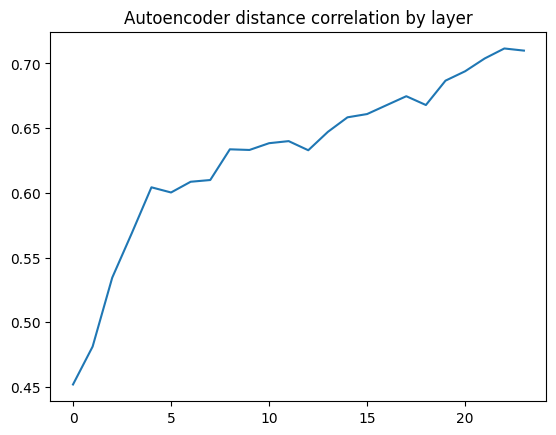

 27%|██████████████████████▏                                                           | 27/100 [01:55<05:10,  4.25s/it]

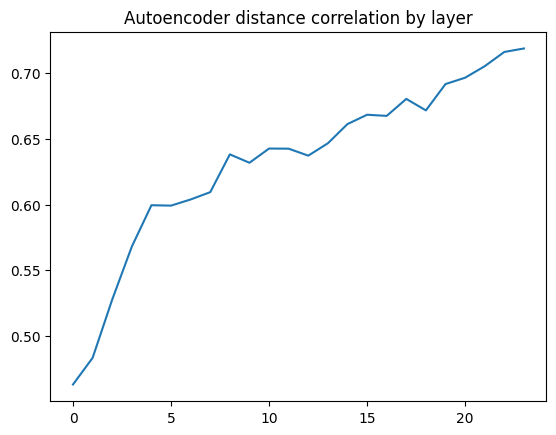

 29%|███████████████████████▊                                                          | 29/100 [02:04<05:09,  4.36s/it]

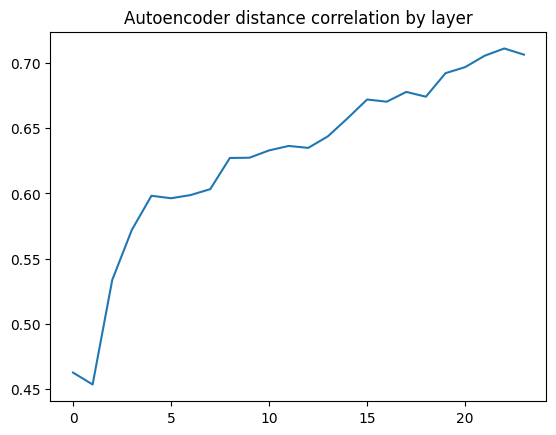

 31%|█████████████████████████▍                                                        | 31/100 [02:13<04:59,  4.35s/it]

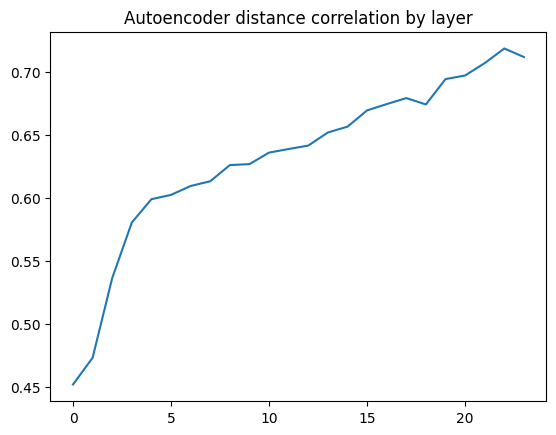

 33%|███████████████████████████                                                       | 33/100 [02:22<04:50,  4.33s/it]

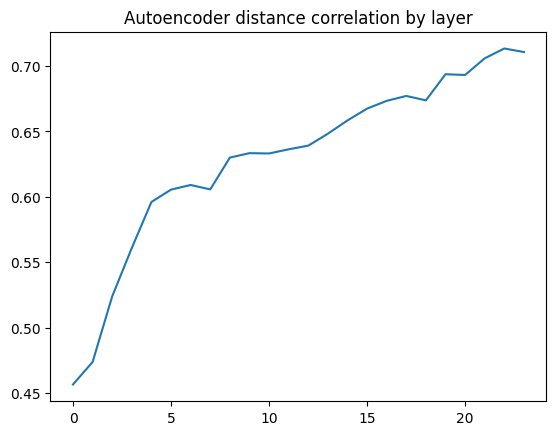

 35%|████████████████████████████▋                                                     | 35/100 [02:30<04:40,  4.31s/it]

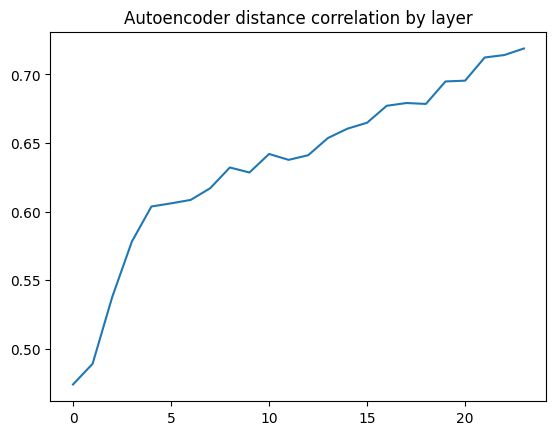

 37%|██████████████████████████████▎                                                   | 37/100 [02:39<04:28,  4.27s/it]

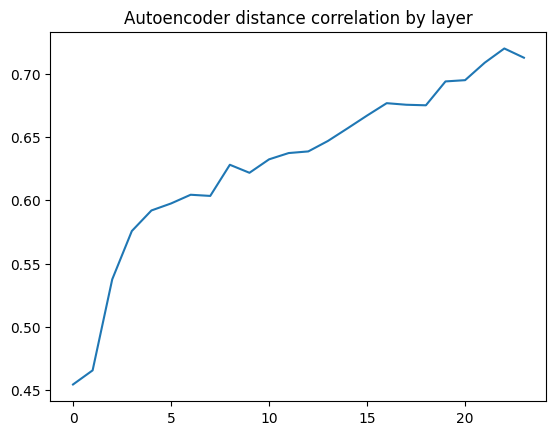

 39%|███████████████████████████████▉                                                  | 39/100 [02:48<04:20,  4.26s/it]

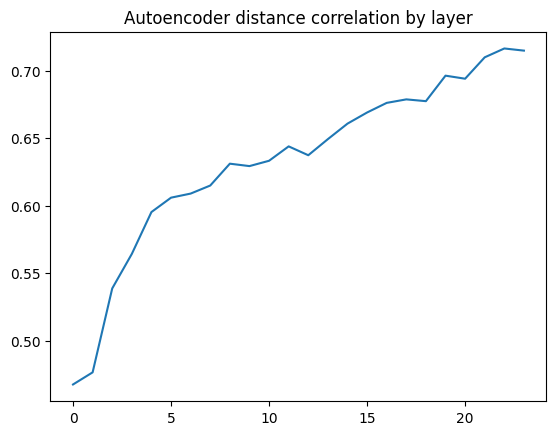

 41%|█████████████████████████████████▌                                                | 41/100 [02:56<04:11,  4.26s/it]

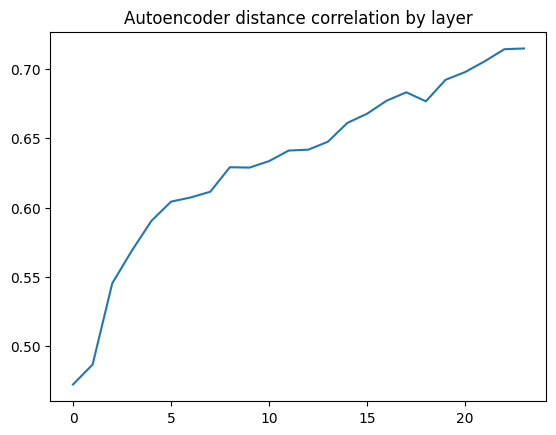

 43%|███████████████████████████████████▎                                              | 43/100 [03:05<04:03,  4.26s/it]

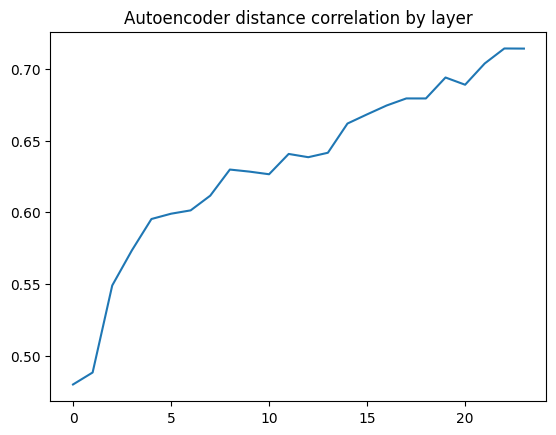

 45%|████████████████████████████████████▉                                             | 45/100 [03:13<03:55,  4.28s/it]

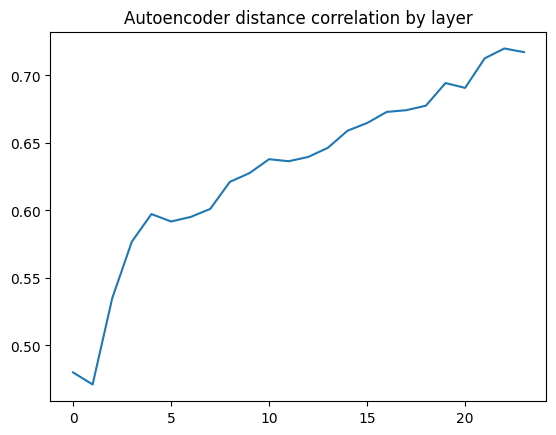

 47%|██████████████████████████████████████▌                                           | 47/100 [03:22<03:46,  4.28s/it]

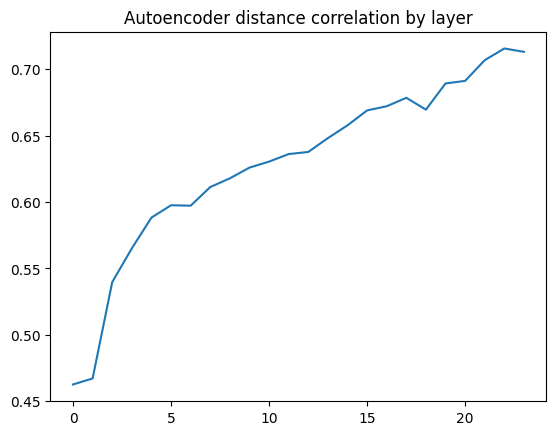

 49%|████████████████████████████████████████▏                                         | 49/100 [03:31<03:38,  4.28s/it]

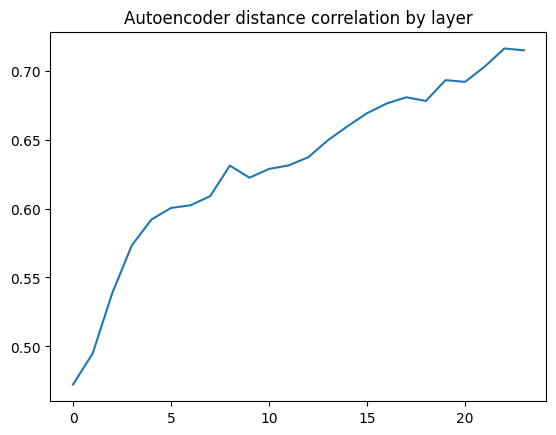

 51%|█████████████████████████████████████████▊                                        | 51/100 [03:39<03:29,  4.28s/it]

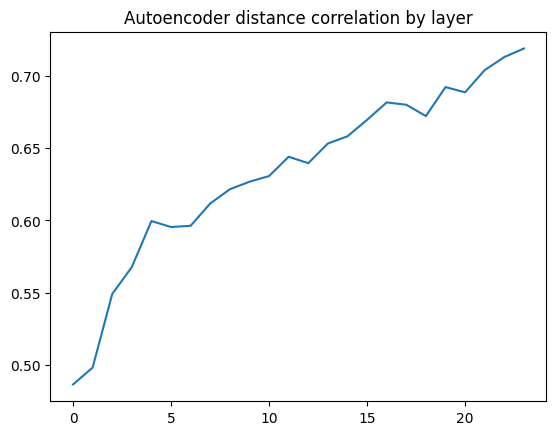

 53%|███████████████████████████████████████████▍                                      | 53/100 [03:48<03:21,  4.28s/it]

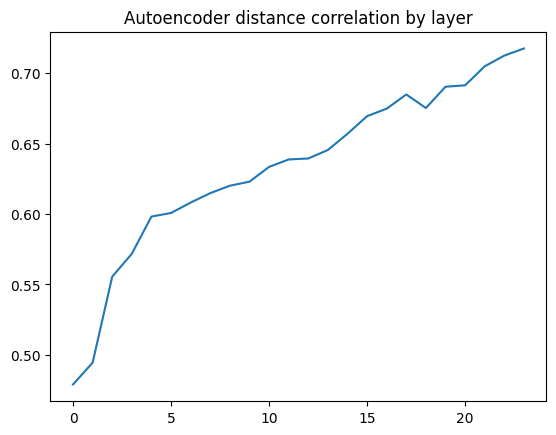

 55%|█████████████████████████████████████████████                                     | 55/100 [03:57<03:13,  4.30s/it]

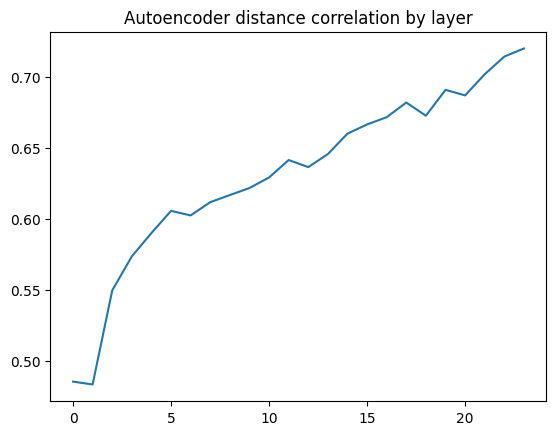

 57%|██████████████████████████████████████████████▋                                   | 57/100 [04:05<03:01,  4.22s/it]

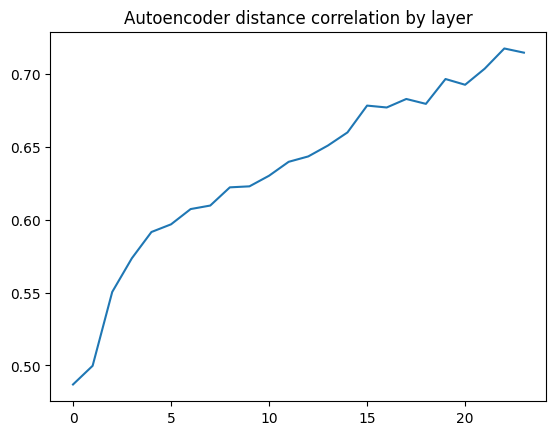

 59%|████████████████████████████████████████████████▍                                 | 59/100 [04:14<02:53,  4.24s/it]

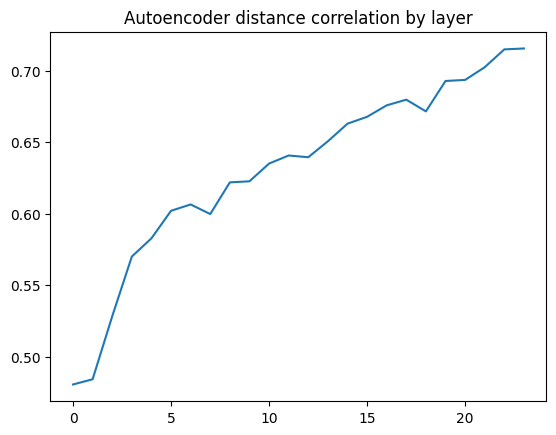

 61%|██████████████████████████████████████████████████                                | 61/100 [04:22<02:45,  4.25s/it]

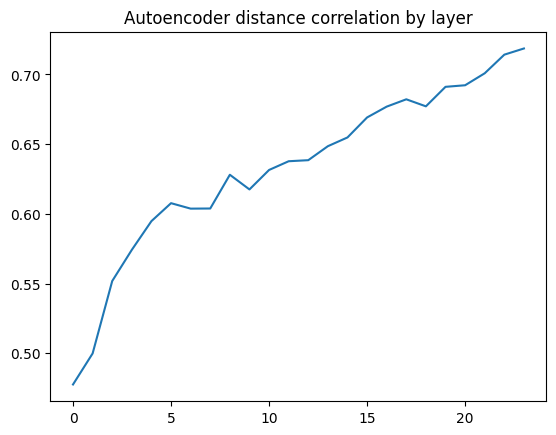

 63%|███████████████████████████████████████████████████▋                              | 63/100 [04:31<02:37,  4.27s/it]

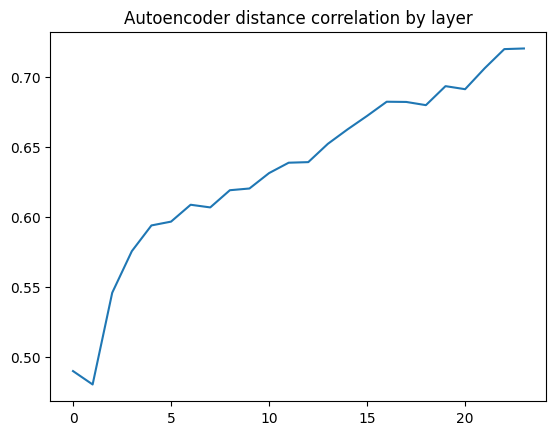

 65%|█████████████████████████████████████████████████████▎                            | 65/100 [04:39<02:27,  4.21s/it]

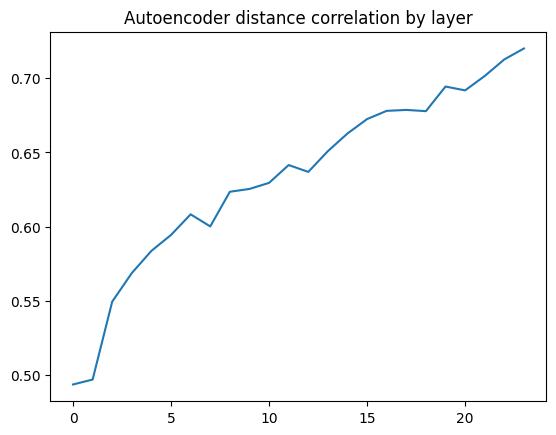

 67%|██████████████████████████████████████████████████████▉                           | 67/100 [04:48<02:19,  4.22s/it]

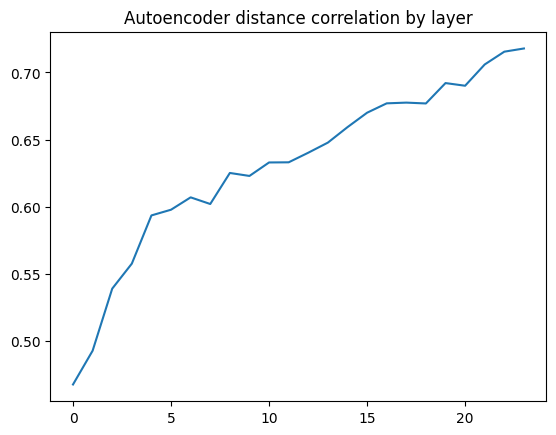

 69%|████████████████████████████████████████████████████████▌                         | 69/100 [04:57<02:12,  4.26s/it]

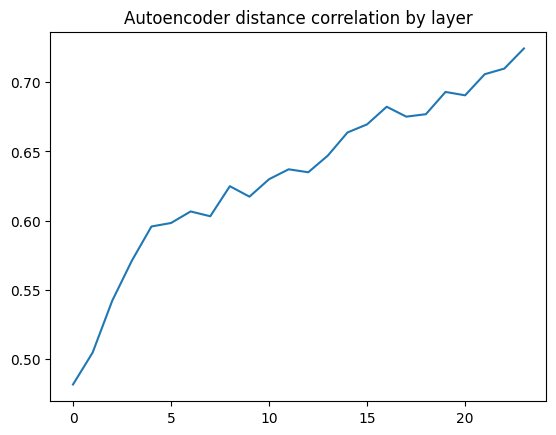

 71%|██████████████████████████████████████████████████████████▏                       | 71/100 [05:05<02:02,  4.24s/it]

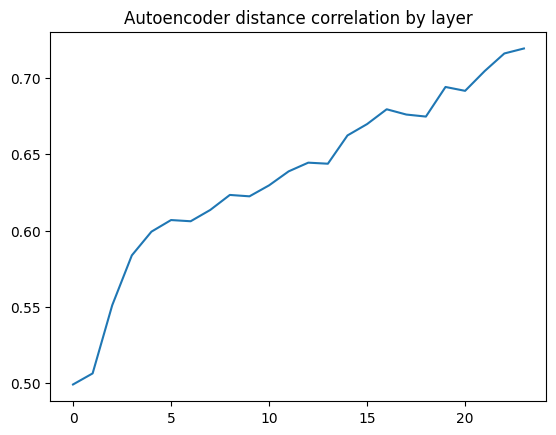

 73%|███████████████████████████████████████████████████████████▊                      | 73/100 [05:14<01:55,  4.28s/it]

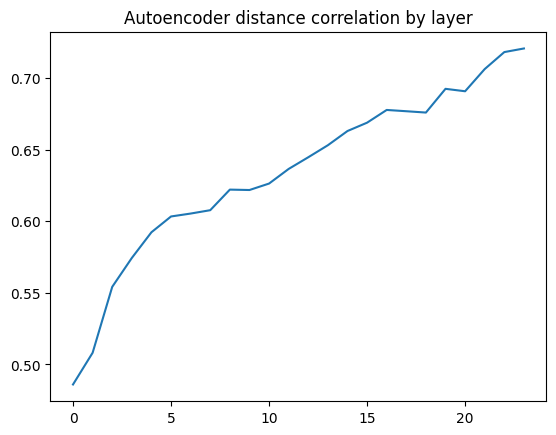

 75%|█████████████████████████████████████████████████████████████▌                    | 75/100 [05:23<01:47,  4.28s/it]

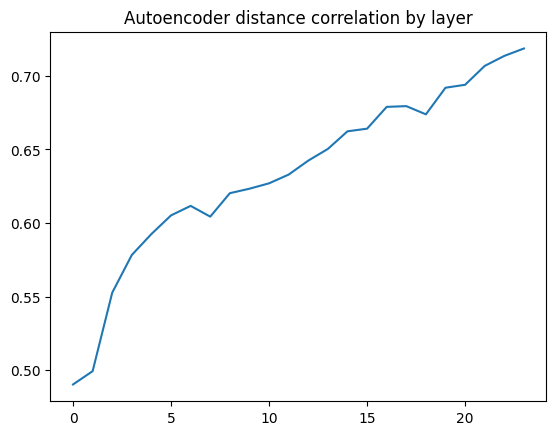

 77%|███████████████████████████████████████████████████████████████▏                  | 77/100 [05:31<01:38,  4.29s/it]

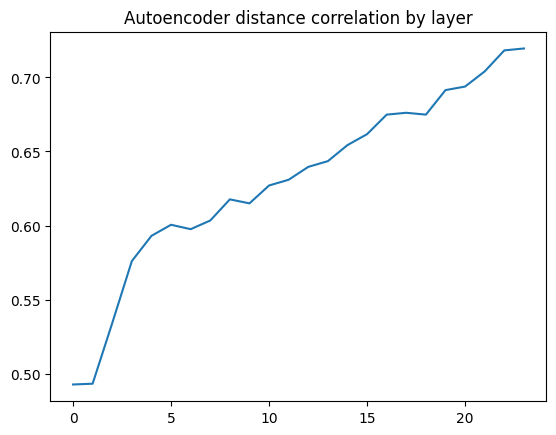

 79%|████████████████████████████████████████████████████████████████▊                 | 79/100 [05:40<01:30,  4.29s/it]

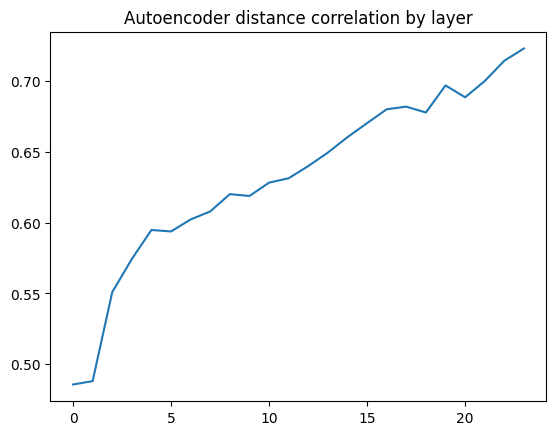

 81%|██████████████████████████████████████████████████████████████████▍               | 81/100 [05:49<01:21,  4.30s/it]

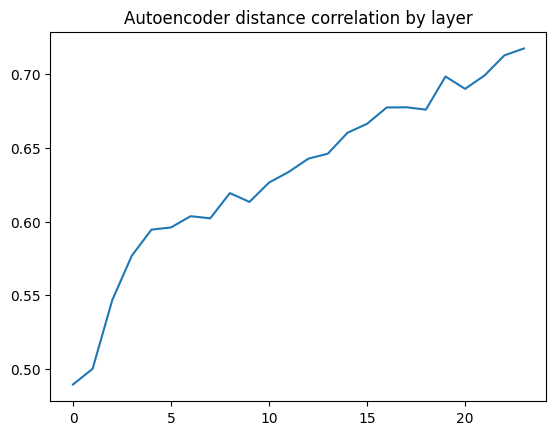

 83%|████████████████████████████████████████████████████████████████████              | 83/100 [05:57<01:13,  4.30s/it]

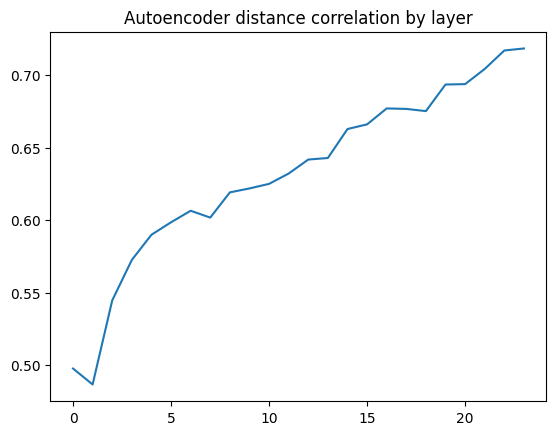

 85%|█████████████████████████████████████████████████████████████████████▋            | 85/100 [06:06<01:04,  4.30s/it]

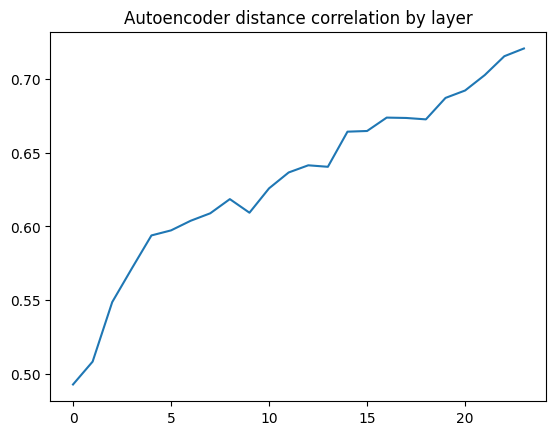

 87%|███████████████████████████████████████████████████████████████████████▎          | 87/100 [06:15<00:55,  4.30s/it]

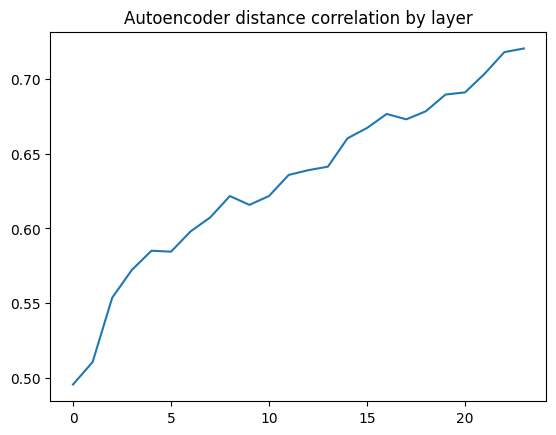

 89%|████████████████████████████████████████████████████████████████████████▉         | 89/100 [06:23<00:47,  4.28s/it]

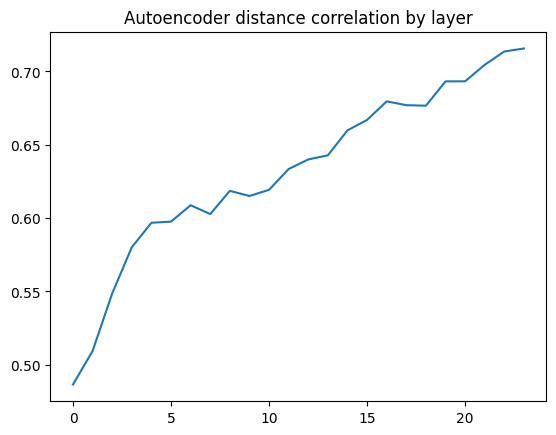

 91%|██████████████████████████████████████████████████████████████████████████▌       | 91/100 [06:32<00:38,  4.30s/it]

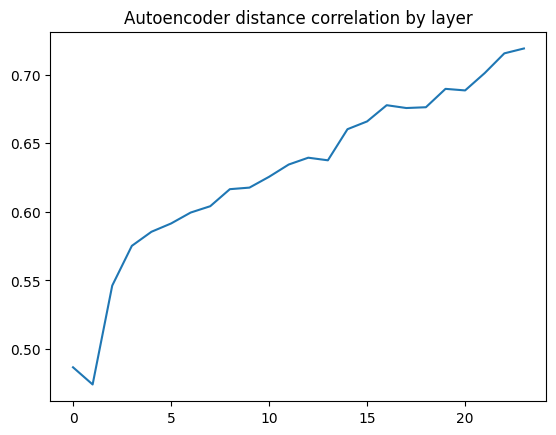

 93%|████████████████████████████████████████████████████████████████████████████▎     | 93/100 [06:41<00:30,  4.29s/it]

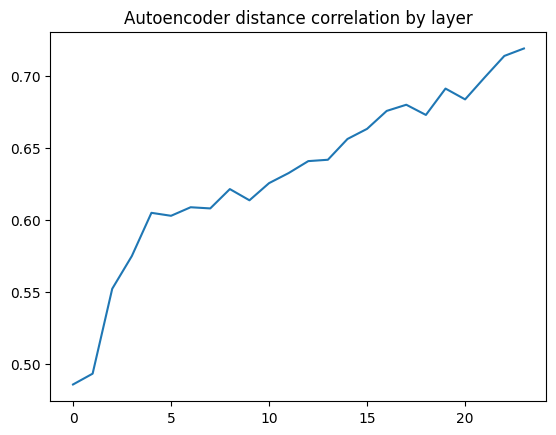

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 95/100 [06:49<00:21,  4.23s/it]

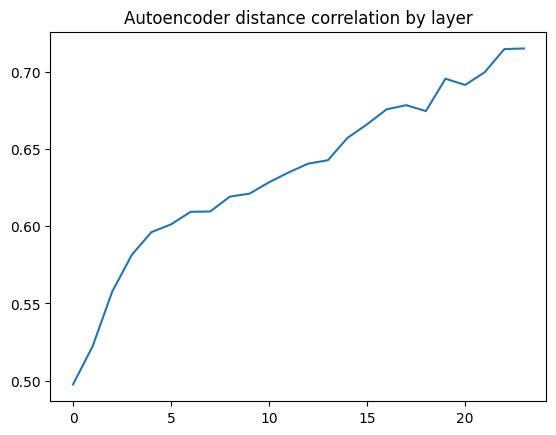

 97%|███████████████████████████████████████████████████████████████████████████████▌  | 97/100 [06:58<00:12,  4.25s/it]

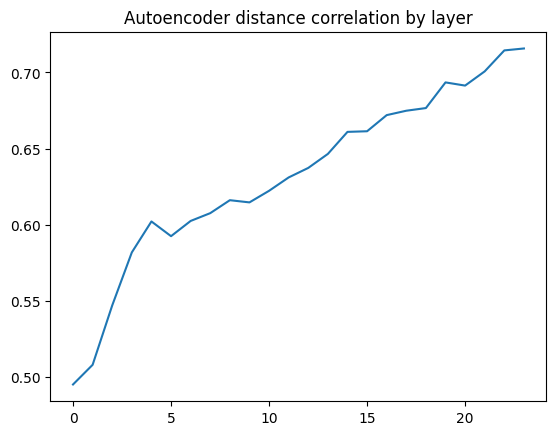

 99%|█████████████████████████████████████████████████████████████████████████████████▏| 99/100 [07:06<00:04,  4.27s/it]

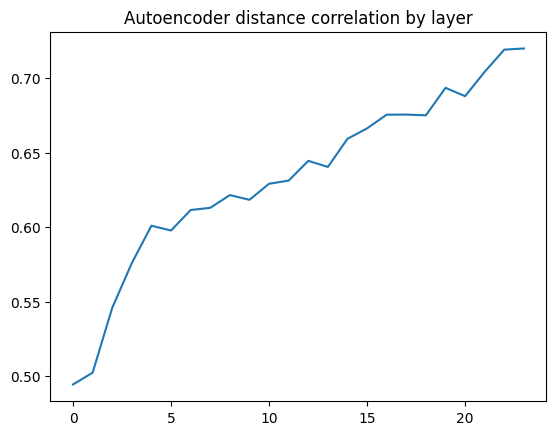

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [07:11<00:00,  4.31s/it]


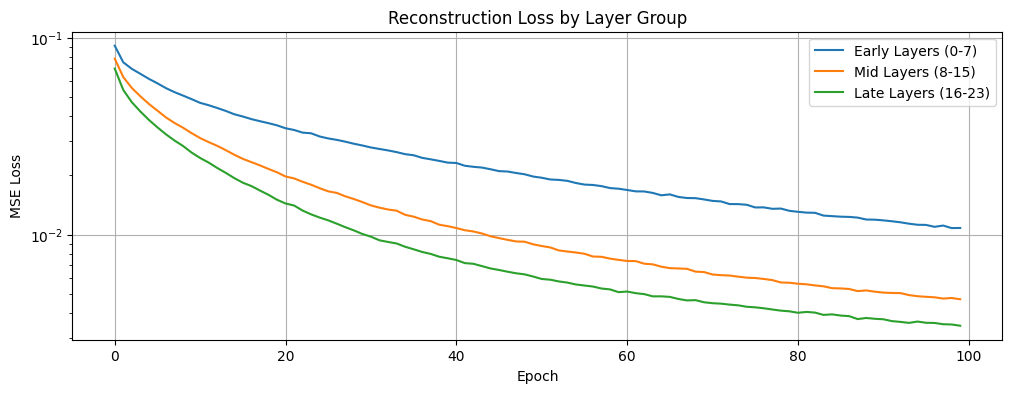

In [15]:
# Use different learning rates for different layers
lrs = [3e-4 * (1 + i/24) for i in range(n_layers)]  # Higher lr for harder layers. From 3e-4 -> 3e-4*3

sup_encs = [deepcopy(ae.encode).cuda() for ae in encoders]

optimizers = [torch.optim.AdamW(ae.parameters(), lr=lr, weight_decay=0.01) for ae, lr in zip(sup_encs, lrs)]

# Modified training loop with layer-specific logging
def train_epoch(models, first, second, scores, optimizers, batch_size=64):
    indices = torch.randperm(first.shape[0])
    first_shuffled = first[indices]
    second_shuffled = second[indices]
    scores_shuffled = scores[indices]
    
    losses = []
    n_batches = first_shuffled.shape[0] // batch_size
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        
        batch_losses = []
        for i, (model, optimizer) in enumerate(zip(models, optimizers)):
            model.train()
            first_batch = first_shuffled[start_idx:end_idx, i].cuda()
            second_batch = second_shuffled[start_idx:end_idx, i].cuda()
            scores_batch = scores_shuffled[start_idx:end_idx].cuda()
            
            optimizer.zero_grad()
            
            f = model(first_batch)
            s = model(second_batch)

            sims = F.cosine_similarity(f, s, dim=-1)
            
            loss = F.mse_loss(sims, scores_batch)
            loss.backward()
            optimizer.step()
            
            batch_losses.append(loss.item())
        
        losses.append(batch_losses)
    
    return np.mean(losses, axis=0)

# Training with more detailed monitoring
early_layers_history = []
mid_layers_history = []
late_layers_history = []

all_acts = wikitext_acts
all_test_acts = torch.concat((first_test, second_test), axis=0)

for epoch in tqdm(range(100)):
    losses = train_epoch(sup_encs, first_train, second_train, train_scores, optimizers)
    
    # Track different layer groups
    early_layers_history.append(np.mean(losses[:8]))
    mid_layers_history.append(np.mean(losses[8:16]))
    late_layers_history.append(np.mean(losses[16:]))
    
    if (epoch+1) % 2 == 0:
        with torch.no_grad():
            plot_autoencoder_corr(sup_encs, True)

# Plot training curves
plt.figure(figsize=(12, 4))
plt.plot(early_layers_history, label='Early Layers (0-7)')
plt.plot(mid_layers_history, label='Mid Layers (8-15)')
plt.plot(late_layers_history, label='Late Layers (16-23)')
plt.title('Reconstruction Loss by Layer Group')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

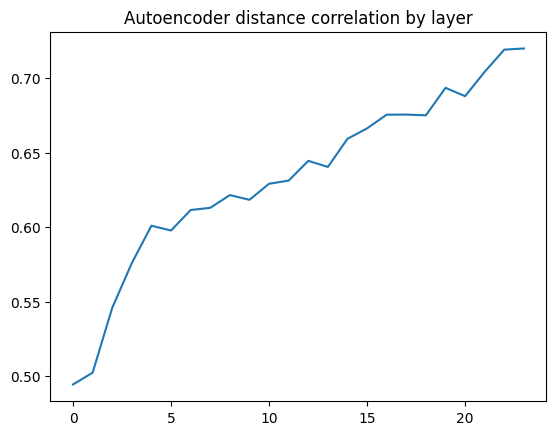

In [17]:
corrs = plot_autoencoder_corr(sup_encs, True)

In [18]:
corrs

[0.4942864775657654,
 0.502213716506958,
 0.5457626581192017,
 0.5758445262908936,
 0.6009334325790405,
 0.5977159142494202,
 0.6114773154258728,
 0.6129536032676697,
 0.6215110421180725,
 0.6183363199234009,
 0.6291289925575256,
 0.6312341690063477,
 0.6445030570030212,
 0.6404300928115845,
 0.6593222618103027,
 0.6663249731063843,
 0.6755228638648987,
 0.6755772829055786,
 0.67507004737854,
 0.6935476660728455,
 0.6879363656044006,
 0.7043645977973938,
 0.7192095518112183,
 0.7199864983558655]

In [20]:
class SiameseNetwork(nn.Module):
    def __init__(self, mlp):
        super().__init__()
        self.mlp = mlp

    def forward(self, x1, x2):
        h1 = self.mlp(x1)
        h2 = self.mlp(x2)
        return F.cosine_similarity(h1, h2, dim=-1)

class LayerwiseSiameseNetworks(nn.Module):
    def __init__(self, encoders, n_layers=24, d_in=1024, d_hidden=256):
        super().__init__()
        self.n_layers = n_layers
        self.layer_nets = nn.ModuleList([SiameseNetwork(encoders[i]) for i in range(n_layers)])

    def forward(self, x1, x2):
        similarities = []
        for layer in range(self.n_layers):
            net_at_layer = self.layer_nets[layer].cuda()
            # Get the activations at the given layer
            x1_l = x1[:, layer].cuda()
            x2_l = x2[:, layer].cuda()

            sim_at_layer = net_at_layer(x1_l, x2_l)
            # print(sim_at_layer.shape)
            similarities.append(sim_at_layer)

        return torch.stack(similarities, dim=-1)

class SimilarityLearner(nn.Module):
    def __init__(self, encoders, n_layers=24, d_in=1024, d_hidden=256, d_out_hidden=512, dropout=0.1):
        super().__init__()
        self.layer_nets = LayerwiseSiameseNetworks(encoders, n_layers, d_in, d_hidden)

        self.mlp = nn.Sequential(
            nn.Linear(n_layers, d_out_hidden),
            nn.LayerNorm(d_out_hidden),
            nn.Dropout(dropout),  # Add dropout after normalization
            nn.GELU(),
            nn.Linear(d_out_hidden, d_out_hidden),
            nn.LayerNorm(d_out_hidden),
            nn.Dropout(dropout),  # Add dropout after normalization
            nn.GELU(),
            nn.Linear(d_out_hidden, d_out_hidden),
            nn.LayerNorm(d_out_hidden),
            nn.Dropout(dropout),  # Add dropout after normalization
            nn.GELU(),
            nn.Linear(d_out_hidden, 1),
            nn.Hardsigmoid()
        )

    def forward(self, x1, x2, training=True):
        layerwise_similarities = self.layer_nets(x1, x2)
        similarity = self.mlp(layerwise_similarities)
        return similarity.squeeze()

In [24]:
from copy import deepcopy
cloned_encoders = deepcopy(sup_encs)

similarity_learner = SimilarityLearner(cloned_encoders, d_hidden=512).to('cuda:0')
# similarity_learner = SimilarityLearner([Autoencoder(i) for i in range(24)], d_hidden=512).to('cuda:0')
optimizer = torch.optim.Adam(similarity_learner.parameters(), lr=3e-4)

def train_epoch(model, first_acts, second_acts, scores, optimizer, batch_size=128):
    indices = torch.randperm(first_acts.shape[0])
    shuffled_first = first_acts[indices]
    shuffled_second = second_acts[indices]
    shuffled_scores = scores[indices]

    model.train()
    total_loss = 0
    n_batches = first_acts.shape[0] // batch_size
    
    for batch in range(n_batches):
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        
        x1_batch = shuffled_first[start_idx:end_idx].cuda()
        x2_batch = shuffled_second[start_idx:end_idx].cuda()
        scores_batch = shuffled_scores[start_idx:end_idx].cuda()
        
        optimizer.zero_grad()
        
        sims = model(x1_batch, x2_batch)
        
        loss = F.mse_loss(sims, scores_batch)        
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / n_batches

best_test_corr = 0
best_model = None

for epoch in tqdm(range(10)):
    # Training
    loss = train_epoch(similarity_learner, first_train, second_train, train_scores, optimizer)
    
    # Evaluation
    similarity_learner.eval()
    with torch.no_grad():
        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            # Get training correlations
            train_preds = similarity_learner(first_train.cuda(), second_train.cuda(), training=False)
            train_corr = torch.corrcoef(torch.stack([train_preds.cpu(), train_scores]))[0,1]
            
            # Get test correlations
            test_preds = similarity_learner(first_test.cuda(), second_test.cuda(), training=False)
            test_corr = torch.corrcoef(torch.stack([test_preds.cpu(), test_scores]))[0,1]

            if test_corr > best_test_corr:
                best_test_corr = test_corr
                best_model = deepcopy(similarity_learner)

            print(f"Epoch {epoch+1}")
            print(f"Loss: {loss:.4f}")
            print(f"Train correlation: {train_corr:.4f}")
            print(f"Test correlation: {test_corr:.4f}\n")

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]

Epoch 10
Loss: 0.0010
Train correlation: 0.9931
Test correlation: 0.7140

